In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time
import sys

sys.path.insert(1, '/rds/general/user/lr4617/home/4th_Year_Project/Final_Year_Project/')

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE_
from scipy.spatial import distance
from scipy.stats import entropy
from mPE_ultis import integrand, ubble, array_list, permutation
from util import rolling_mean, probability_v2, get_mPE_matrix, get_vel_matrix
from sklearn.cluster import KMeans

In [20]:
rats = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/rats_sampling_10_window_150_ordered.npy')
lengths = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/lengths.npy')

to_be_removed = '.ipynb_checkpoints'

root_dir = '/rds/general/user/lr4617/home/4th_Year_Project/CAPTURE_rat_multidimensional/raw_data/'
normal_trajs = os.listdir(root_dir + 'normal')
drug_trajs_1 = os.listdir(root_dir + 'caffeine')
drug_trajs_2 = os.listdir(root_dir + 'amphetamine')


if to_be_removed in normal_trajs:
    idx = normal_trajs.index(to_be_removed)
    normal_trajs.pop(idx)
    normal_trajs.sort()

    
if to_be_removed in drug_trajs_1:
    idx = drug_trajs_1.index(to_be_removed)
    drug_trajs_1.pop(idx)
    drug_trajs_1.sort()

if to_be_removed in drug_trajs_2:
    idx = drug_trajs_2.index(to_be_removed)
    drug_trajs_2.pop(idx)
    drug_trajs_2.sort()

names = normal_trajs + drug_trajs_1 + drug_trajs_2

print(names)

['traj_1', 'traj_2', 'traj_3', 'traj_5', 'traj_8', 'traj_4', 'traj_2', 'traj_6', 'traj_5', 'traj_3', 'traj_7', 'traj_1']


In [21]:
def get_vel_matrix_(trajectory, bins_number, traj_number, orders, random=False, least_varaince_zdim=0):
    
    if random:
        bins_number = 4
        vel_matrix = np.zeros((bins_number, traj_number, len(orders)))
        traj_length = int((trajectory.shape[0]/bins_number)/traj_number)
        
        print(vel_matrix.shape)

        for i in range(bins_number):
            idx = 0
            for j in range(0, traj_length*traj_number, traj_length):
                idx_1 = np.random.randint(np.max(trajectory.shape) - traj_length)
                traj = trajectory[idx_1: idx_1 + traj_length]
                traj = np.asarray(traj)
                vel_bin = 0
                last_point = traj[0, :]

                for point in traj:
                    vel_bin = vel_bin + distance.euclidean(point, last_point)
                    last_point = point
                
                vel_matrix[i, idx, 0] = vel_bin/(traj_length)
                idx += 1
        
        mPE_vector = []
        
    else:
        if trajectory.shape[0] < trajectory.shape[1]:
            trajectory =  trajectory.transpose()

        dims = 2

        mPE_vector = np.zeros((bins_number, traj_number, len(orders)))
        vel_matrix = np.zeros((bins_number, traj_number, len(orders)))

        traj_length = int((trajectory.shape[0]/bins_number)/traj_number)

        for a, order in enumerate(orders):

            for i in range(bins_number):

                idx = 0
                idx_1 = 0

                for j in range(0, traj_length*traj_number, traj_length):

                    idx_1 = i*traj_number*traj_length 
                    traj = trajectory[idx_1 + j: idx_1 + j + traj_length, :]
                    traj = np.asarray(traj)
                    vel_bin = 0
                    last_point = traj[0, :]

                    for point in traj:
                        vel_bin = vel_bin + distance.euclidean(point, last_point)
                        last_point = point

                    if traj.shape[0]>0:
                        [HH, _] = mPE_(traj, order)
                        mPE_vector[i, idx] = HH

                    vel_matrix[i, idx, a] = vel_bin/(traj_length)

                    idx += 1
                
    return mPE_vector, vel_matrix

traj_1
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


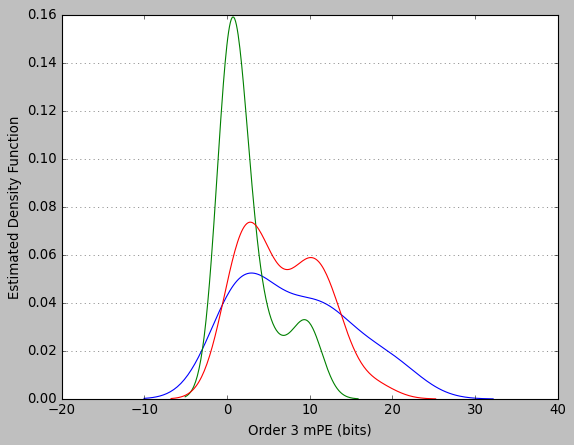

traj_2
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


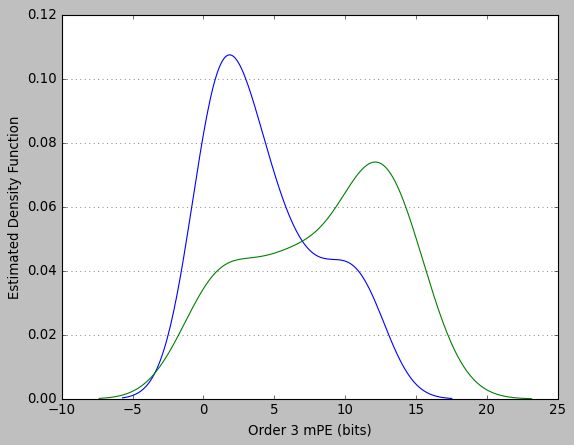

traj_3
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


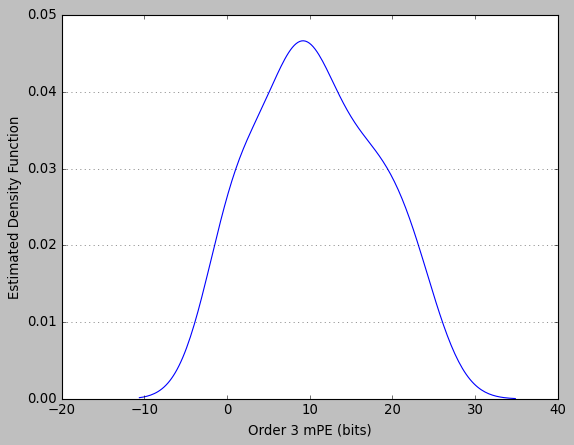

traj_5
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
(1339200, 3)
########################## CONTROL ANALYSIS ##########################
(4, 30, 1)
0.8079631540901643 0.034580084963334506 0.39294501397971776
########################## ENTROPY ANALYSIS ##########################
6 30


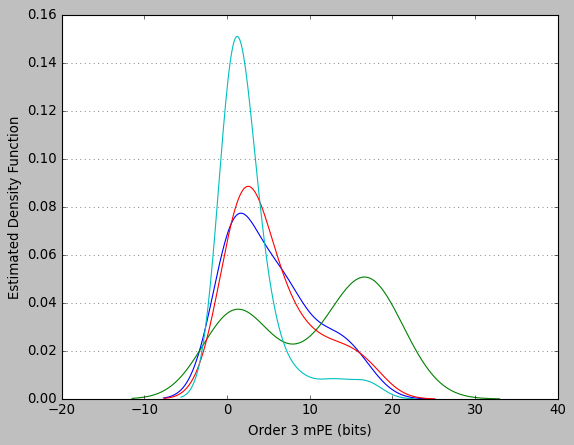

traj_8
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


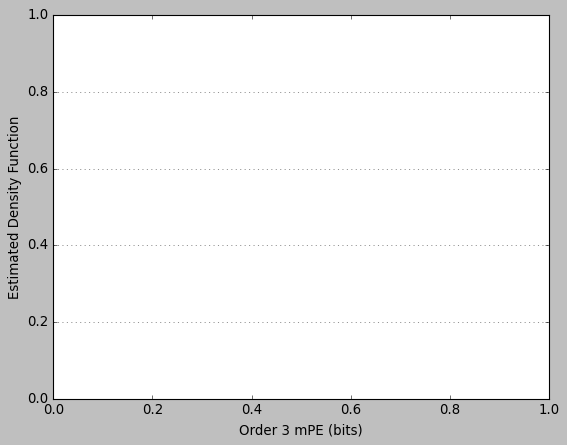

traj_4
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


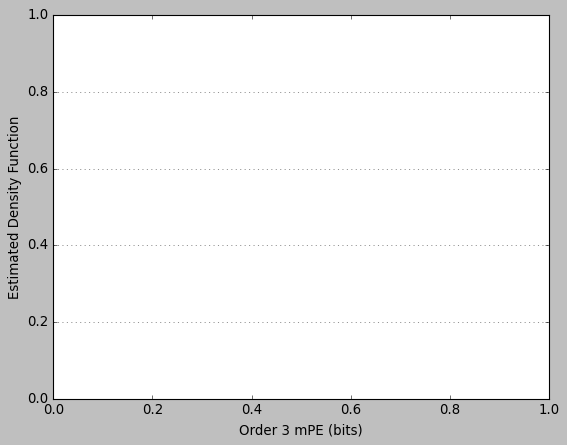

traj_2
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


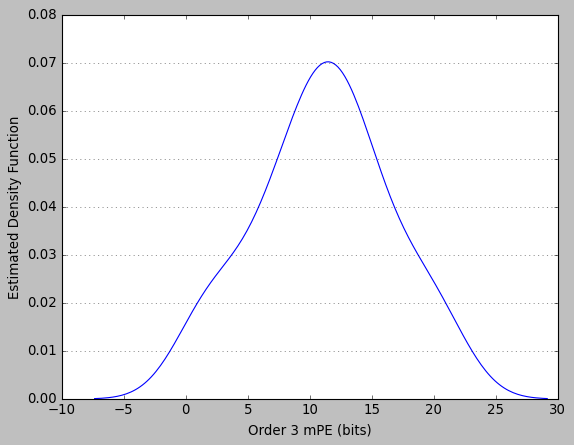

traj_6
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
(1339200, 3)
########################## CONTROL ANALYSIS ##########################
(4, 30, 1)
0.23907300248018645 0.39294501397971776 0.9578462903438838
########################## ENTROPY ANALYSIS ##########################
6 30


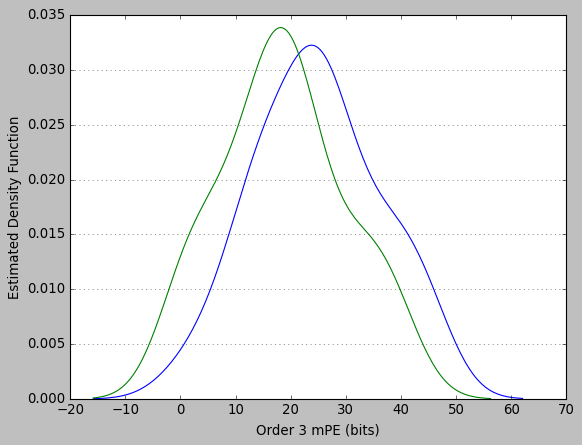

traj_5
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


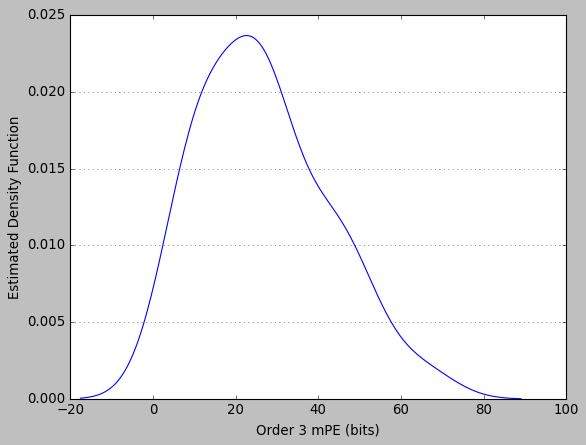

traj_3
########################## APPLY PCA ##########################
signal shape:  (194400, 3)
########################## ENTROPY ANALYSIS ##########################
3 30


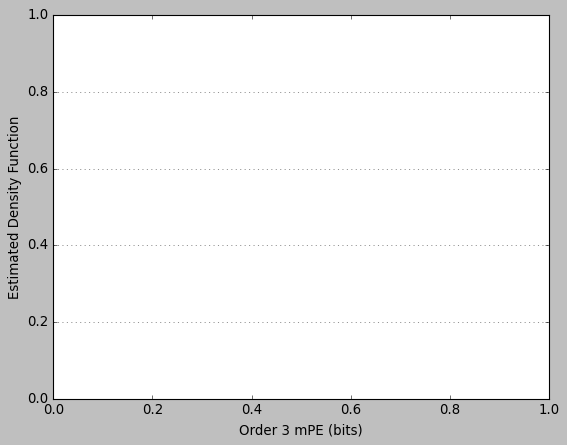

traj_7
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
########################## ENTROPY ANALYSIS ##########################
6 30


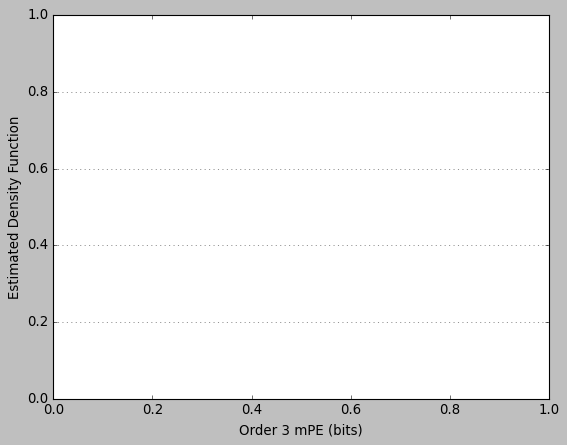

traj_1
########################## APPLY PCA ##########################
signal shape:  (334800, 3)
(1198800, 3)
########################## CONTROL ANALYSIS ##########################
(4, 30, 1)
0.5940706297759378 0.9578462903438838 0.9578462903438838
########################## ENTROPY ANALYSIS ##########################
6 30


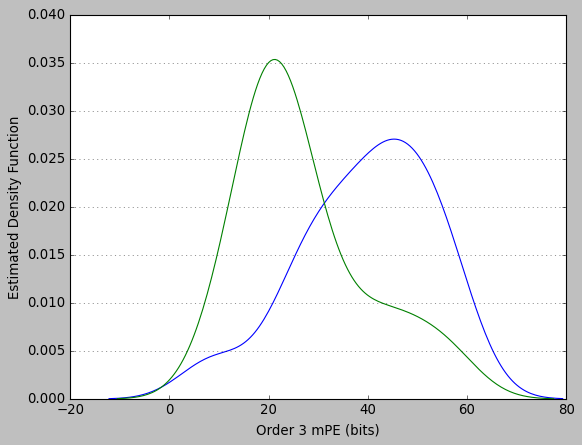

In [23]:
###################################################################################################################################################
####################################################################### PCA #######################################################################
###################################################################################################################################################

significance_level = 0.05
n_clusters_kmeans = 15
unit_length_entropy = 1800
save = True
nPCs = [3]
use_PCA = True
max_length = 334800

########### TUNE #############
use_all = True 
use_partition_up = False
use_partition_down = False 
use_single = False 
##############################

if use_single:
    nPCs = [3]
    dims = np.arange(9,12)
    use_PCA = False
    add_on = '_marker'

if use_partition_up:
    nPCs = [3]
    dims_1 = np.arange(24)
    dims_2 = np.arange(36,42)
    use_PCA = True
    add_on = '_partition_up'
    
    dims = np.concatenate((dims_1,dims_2), axis=0)

if use_partition_down:
    nPCs = [3]
    dims_1 = np.arange(24,36)
    dims_2 = np.arange(42,60)
    use_PCA = True
    add_on = '_partition_down'
    
    dims = np.concatenate((dims_1,dims_2), axis=0)
    
if use_all:
    dims = np.arange(60)
    use_PCA = True

for n_PC in nPCs:
    
    count = 0
    
    for which_traj, length in enumerate(lengths):

        if count <= 3:
            mode = 'normal'
        elif count >= 4 and count <=7:
            mode = 'caffeine'
        else:
            mode = 'amphetamine'

        name = names[count]
        print(name)

        if which_traj == 0:
            idx = 0
        else:
            idx += lengths[which_traj-1]

        traj = rats[idx:idx+length, :]
        
        if use_PCA:

            print('########################## APPLY PCA ##########################')

            pca = PCA()
            pca.fit(traj)

            # reduce data according to explained variance values using linear PCA
            pca = PCA(n_components=n_PC)
            reduced_traj = pca.fit_transform(traj)
            if reduced_traj.shape[0] > max_length:
                reduced_traj = reduced_traj[0:max_length, :]
                
        else:
            if traj.shape[0] > max_length:
                reduced_traj = traj[0:max_length, dims]

        print('signal shape: ', reduced_traj.shape)
        
        ##### Control vector assemble #####
        if count == 0 or count ==  4 or count == 8:
            control_vector = reduced_traj
        else:
            control_vector = np.concatenate((control_vector, reduced_traj),axis=0)
        
        ###################################################################################################################################################
        ########################################################### CONTROL ANALYSIS ######################################################################
        ###################################################################################################################################################
        
        ########## Take random trajectories and check that they have approximately the same mPE ##########
        
        if count == 3 or count ==  7 or count == 11:
            print(control_vector.shape)
            print('########################## CONTROL ANALYSIS ##########################')

            unit_length = unit_length_entropy
            minutes = 30
            bin_length = 30*60*minutes
            bins_number = int(control_vector.shape[0]/bin_length)
            traj_number = int(bin_length/unit_length)
            orders = [3]
            random = True

            too_low = True
            while too_low == True:
                
                _, mPE_vector = get_vel_matrix_(control_vector, bins_number, traj_number, orders, random=True)
                
                 ########## calculate p-value ##########
                [_, p_value_1] = stats.ks_2samp(mPE_vector[0, :, 0], mPE_vector[1, :, 0])
                [_, p_value_2] = stats.ks_2samp(mPE_vector[1, :, 0], mPE_vector[2, :, 0])
                [_, p_value_3] = stats.ks_2samp(mPE_vector[2, :, 0], mPE_vector[3, :, 0])
                
                if p_value_1 and  p_value_2 and p_value_3 > 0.3:
                    too_low = False
                    break

            path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity' + str(add_on) + '/' + str(n_PC) + 'PC/control/' + mode + '/' + name + '.npy'
            np.save(path_out, mPE_vector)
            
            print(p_value_1, p_value_2, p_value_3)
            ########## Retrieve maxiumum number of elements based on a raw decimal discretization ##########
            data = mPE_vector.flatten()
            kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
            kmeans.predict(data.reshape(-1,1))
            centroids = kmeans.cluster_centers_
            centroids = [centroids[i] for i in range(len(centroids))]
            centroids = np.asarray(centroids)

            ########## Get probability vectors ##########
            prob1 = probability_v2(mPE_vector[0, :, 0], centroids)
            prob2 = probability_v2(mPE_vector[1, :, 0], centroids)
            prob3 = probability_v2(mPE_vector[2, :, 0], centroids)
            prob4 = probability_v2(mPE_vector[3, :, 0], centroids)

            ########## Evaluation ##########
            js_distance = distance.jensenshannon(prob1, prob2)
            js_distance = distance.jensenshannon(prob2, prob3)
            js_distance = distance.jensenshannon(prob3, prob4)



        ###################################################################################################################################################
        ########################################################### ENTROPY ANALYSIS ######################################################################
        ###################################################################################################################################################


        print('########################## ENTROPY ANALYSIS ##########################')

        ########## Entropy Calculation ##########
        unit_length = unit_length_entropy
        minutes = 30
        bin_length = 30*60*minutes
        bins_number = int(reduced_traj.shape[0]/bin_length)
        traj_number = int(bin_length/unit_length)
        
        orders = [3]
        
        print(bins_number, traj_number)

        ########## Calculate mPE vector ##########
        _, mPE_vector = get_vel_matrix_(reduced_traj, bins_number, traj_number, orders, random=False)
        path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity' + str(add_on) + '/' + str(n_PC) + 'PC/result/' + mode + '/' + name + '.npy'
        # np.save(path_out, mPE_vector)

        ########## Retrieve maxiumum number of elements based on k-means discretization ##########
        data = mPE_vector.flatten()
        kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
        kmeans.predict(data.reshape(-1,1))
        centroids = kmeans.cluster_centers_
        centroids = [centroids[i] for i in range(len(centroids))]
        centroids = np.asarray(centroids)

        ########## plotting mPE continuous distribution as a function of time ##########        
        fig = plt.figure()
        compare_to = mPE_vector[0, :, 0]
        p_value_array = np.zeros((bins_number-1, ))
        js_array = np.zeros((bins_number-1, ))
        

        for bin_n in range(1, bins_number):
            [_, p_value] = stats.ks_2samp(mPE_vector[bin_n, :, 0], compare_to)
            p_value_array[bin_n -1] = p_value

            prob1 = probability_v2(compare_to, centroids)
            prob2 = probability_v2(mPE_vector[bin_n, :, 0], centroids)

            js_distance = distance.jensenshannon(prob1, prob2)
            js_array[bin_n -1] = js_distance   

            if p_value <= significance_level:
                ax = sns.kdeplot(300*mPE_vector[bin_n, :, 0])
                compare_to = mPE_vector[bin_n, :, 0]

        plt.grid(axis='y', alpha=0.75)
        plt.xlabel('Order 3 mPE (bits)')
        plt.ylabel('Estimated Density Function')

        # path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity/' + str(n_PC) + 'PC/result/' + mode + '/' + name + '/'
        name_out = mode + '_result_' + name

        plt.show()

        count +=1

In [ ]:
###################################################################################################################################################
############################################################ Velocity vs Entropy ##################################################################
###################################################################################################################################################

block_lengths = [sum(lengths[i*4:(i*4)+4]) for i in range(3)]
PCs = np.arange(1,5)
modes = ['normal', 'caffeine', 'amphetamine']
use_PCA = False
dims = [9,10,11]

for n_PC in PCs:
    
    for i in range(len(block_lengths)):

        if i == 0:
            signal_mode = rats[0:block_lengths[0], :]
        else:
            signal_mode = rats[block_lengths[i-1]:block_lengths[i-1]+block_lengths[i], :]

        for ii in range(4):

            if ii == 0 :
                signal = signal_mode[0:lengths[(i*4)], :]
            else:
                signal = signal_mode[lengths[(i*4) + ii -1]:lengths[(i*4) + ii-1] + lengths[(i*4) + ii], :]
                
            if use_PCA:
                pca = PCA(n_components=n_PC)
                reduced_traj = pca.fit_transform(signal)
            else:
                reduced_traj = reduced_traj[:, dims]

            if ii==0:
                rats_reduced = reduced_traj
            if ii>0:
                rats_reduced = np.concatenate((rats_reduced, reduced_traj), axis=0)
        
        print(rats_reduced.shape)
        
        ################ Calculate instantaneous velocity of each datapoint (maybe only consider x-y dims) ################
        unit_length = 3000
        fs = 30
        minutes = 30
        bin_length = fs*60*minutes
        traj_number = int(bin_length/unit_length)
        bins_number = int(rats_reduced.shape[0]/bin_length)
        order = [3]

        mPE_vector, vel_matrix = get_vel_matrix_(rats_reduced, bins_number, traj_number, order)        
        
        ################ plotting bin-velocity against corresponding mPE and polynomial fit ################
        vel_vector = vel_matrix.flatten()
        mPE_vector_ = mPE_vector.flatten()

        p = np.polyfit(mPE_vector_, vel_vector, 2)

        if order[0] == 3:
            x_new = np.linspace(4,5.8,200)
        else:
            x_new = np.linspace(6,9.2,200)

        ffit = np.polyval(p, x_new)

        fig = plt.figure()

        plt.scatter(mPE_vector_, 1000*vel_vector)
        # plt.plot(x_new, 1000*ffit)

        plt.xlabel('Order ' + str(order) + ' mPE (bits)')
        plt.ylabel('PC velocity')
        plt.ylim([0, 1000*np.max(vel_vector)])

        path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity/' + str(n_PC) + 'PC/en_ve' + modes[i] + '.png'
        plt.savefig(path_out)
        plt.show()